In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import imghdr
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [3]:
data_dir = 'data'
os.listdir(data_dir)

['Boar', 'Elephants', 'Parrots', 'Peacock']

In [ ]:
os.listdir(os.path.join(data_dir,'Boar'))

In [56]:
image_exts = ['jpeg','jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir): 
    print(image_class)
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

Boar
02germany-boar-fpwn-videoSixteenByNine3000.jpg
0x0.jpg
1-1920x1080-7d185ef0ea25e1a373c7ac046ad747b3(1).png
1-1920x1080-7d185ef0ea25e1a373c7ac046ad747b3.png
1216450027-1(1).jpg
1216450027-1.jpg
1280px-Sus_scrofa_-_Pulau_Ubin-3iv9a8t3d37e9vy9zmnls0(1).jpg
1280px-Sus_scrofa_-_Pulau_Ubin-3iv9a8t3d37e9vy9zmnls0.jpg
14096954_112323-ap-super-pig-invasion-img.jpg
1440x810_cmsv2_3016fdd4-5a34-5e69-9a3b-5dfa83d050b4-7824024.jpg
14_3-col_Boars-05_oldy.jpg
1a096c76-c31b-47ce-b5fa-cbda96b102df_Wateringhole.jpg
20171011-_T4A7836-scaled(1).jpg
20171011-_T4A7836-scaled.jpg
20230209-killian-053A7468-277.jpg
2203-cinghiale-boar-900x900-1(1).jpg
2203-cinghiale-boar-900x900-1.jpg
230721-wild-boar-germany-mb-1303-15e620.jpg
278558136_10227949551795063_192381031855209311_n.jpg
2fb3b7fe7aeb452ea39a1425b188dba3.jpeg
2Fmethode2Ftimes2Fprod2Fweb2Fbin2F60a92b94-05f5-11ee-b1f9-dbcd37af20fb.jpg
360_F_201114366_ewVmKvLAoOuJ7c2nAq8aeLyse9WmnUsI.jpg
478086eb-d213-40ce-97b9-8c16896cf745.jpg
5f681de1-0001-0004-000

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\Boar\1200px-Young_wild_boar.jpg
Image not in ext list data\Boar\5f0ce3741a7c08f0565ed97b_Dimensions-Animals-Pigs-Wild-Boar-Poses.svg
Image not in ext list data\Boar\big-male-wild-boar-walking-600w-2343287197.jpg
Image not in ext list data\Boar\Boar(1).jpg
Image not in ext list data\Boar\Boar.jpg
Image not in ext list data\Boar\c208c9fe411441919b326c776bfca970.webp
Image not in ext list data\Boar\ErgAaduTsT3AprEt0w3C.webp
Image not in ext list data\Boar\f761992d52b54bbcbdbe110cdb5b633d.webp
Image not in ext list data\Boar\family-wild-boars-9507085.jpg.webp
Image not in ext list data\Boar\Pic5.jpeg
Image not in ext list data\Boar\vintage-engrave-isolated-hog-set-600w-2179948185.jpg
Image not in ext list data\Boar\Wild-boar(2).jpg
Image not in ext list data\Boar\wild-boar-19th-century-print-24903307.jpg.webp
Image not in ext list data\Boar\Wild-boar-pixabay-no-credit-needed(1).jpg
Image not in ext list data\Boar\Wild-boar.jpg
Image not in ext list data\Boar\Wild

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 2709 files belonging to 4 classes.


In [61]:
data_iterator = data.as_numpy_iterator()
print(data)

<MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [11]:
batch = data_iterator.next()

In [12]:
batch[0].shape

(32, 256, 256, 3)

In [13]:
batch = data_iterator.next()
batch[1]

array([0, 3, 3, 3, 3, 2, 0, 1, 0, 3, 0, 3, 0, 1, 0, 1, 1, 2, 0, 2, 3, 2,
       3, 2, 0, 2, 3, 2, 0, 1, 2, 3])

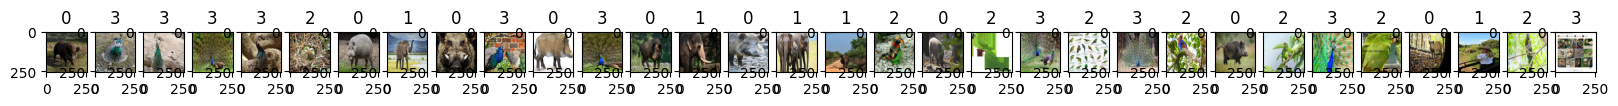

In [14]:
fig, ax = plt.subplots(ncols=32, figsize=(20,20))
for idx, img in enumerate(batch[0][:32]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [15]:
data = data.map(lambda x,y: (x/255, y))

In [16]:
data.as_numpy_iterator().next()

(array([[[[0.49411765, 0.5058824 , 0.47058824],
          [0.49411765, 0.5058824 , 0.47058824],
          [0.4924326 , 0.5041973 , 0.46890318],
          ...,
          [0.27904412, 0.30257353, 0.26335785],
          [0.27628675, 0.2998162 , 0.26060048],
          [0.31461397, 0.33814338, 0.2989277 ]],
 
         [[0.5093137 , 0.5210784 , 0.48958334],
          [0.5093137 , 0.5210784 , 0.48958334],
          [0.5076287 , 0.5193934 , 0.4878983 ],
          ...,
          [0.27986032, 0.30338973, 0.26417404],
          [0.27628675, 0.2998162 , 0.26060048],
          [0.31461397, 0.33814338, 0.2989277 ]],
 
         [[0.51776963, 0.53063726, 0.50373775],
          [0.51776963, 0.53063726, 0.50373775],
          [0.51608455, 0.5289522 , 0.5020527 ],
          ...,
          [0.28072917, 0.30425858, 0.2650429 ],
          [0.27628675, 0.2998162 , 0.26060048],
          [0.31511804, 0.33864745, 0.29943177]],
 
         ...,
 
         [[0.80024797, 0.80416954, 0.7811916 ],
          [0.77682

In [17]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [18]:
train_size

59

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [20]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [65]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape=(256,256,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# model.fit(trainign_images,training_labels,epochs=20,validation_data=(testing_images,testing_labels))

In [66]:
model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 flatten_5 (Flatten)         (None, 230400)           

In [68]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
59/59 [==============================] - 15s 231ms/step - loss: 1.3144 - accuracy: 0.5037 - val_loss: 0.9829 - val_accuracy: 0.6379
Epoch 2/20
59/59 [==============================] - 14s 231ms/step - loss: 0.7244 - accuracy: 0.7346 - val_loss: 0.7992 - val_accuracy: 0.7077
Epoch 3/20
59/59 [==============================] - 15s 234ms/step - loss: 0.5500 - accuracy: 0.8083 - val_loss: 0.6471 - val_accuracy: 0.7868
Epoch 4/20
59/59 [==============================] - 14s 230ms/step - loss: 0.3765 - accuracy: 0.8681 - val_loss: 0.5373 - val_accuracy: 0.8143
Epoch 5/20
59/59 [==============================] - 14s 231ms/step - loss: 0.2430 - accuracy: 0.9195 - val_loss: 0.5315 - val_accuracy: 0.8015
Epoch 6/20
59/59 [==============================] - 14s 232ms/step - loss: 0.1563 - accuracy: 0.9539 - val_loss: 0.6385 - val_accuracy: 0.8401
Epoch 7/20
59/59 [==============================] - 14s 231ms/step - loss: 0.0821 - accuracy: 0.9719 - val_loss: 0.6419 - val_accuracy: 0.8199

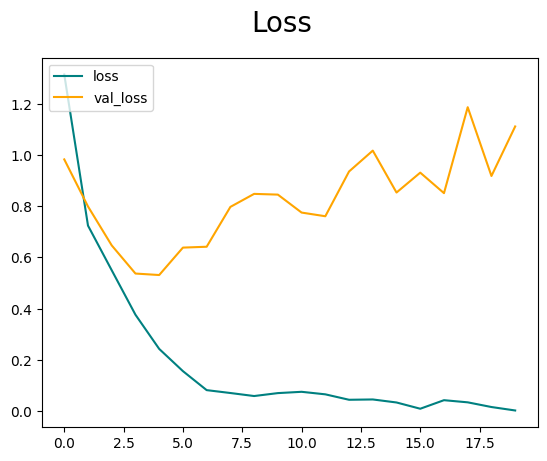

In [69]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

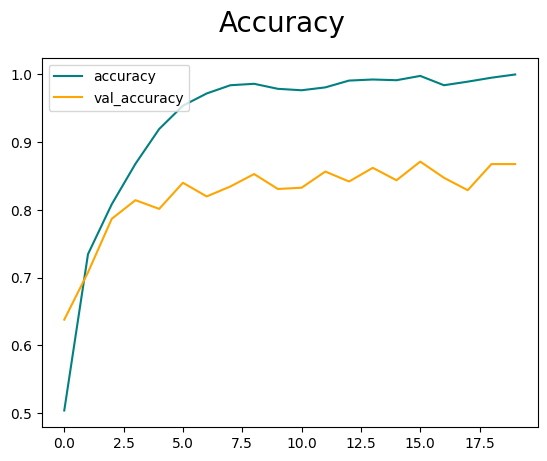

In [70]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [71]:
# loss, accuracy = model.evaluate(testing_images,testing_labels)
# print(f"Loss: {loss}")
# print(f"Accuracy: {accuracy}")

model.save('image_classifire.model')

INFO:tensorflow:Assets written to: image_classifire.model\assets


INFO:tensorflow:Assets written to: image_classifire.model\assets


In [72]:
model = models.load_model('image_classifire.model')

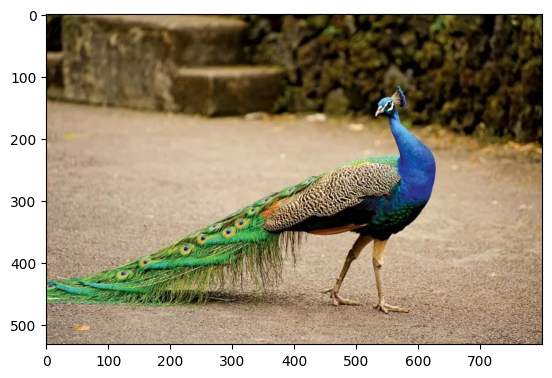

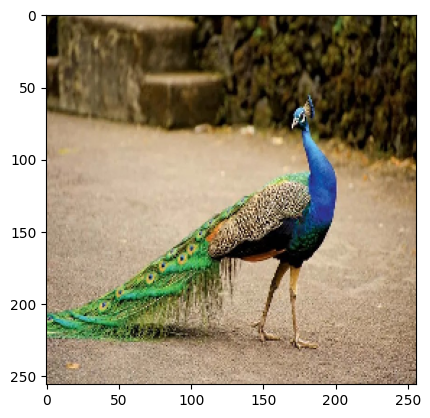

1/1 [==============================] - 0s 18ms/step


3

In [79]:
img = cv.imread('peacock.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()
resize = cv.resize(img,(256,256),interpolation=cv.INTER_CUBIC)
plt.imshow(resize)
plt.show()
prediction = model.predict(np.array([resize])/255)
index = np.argmax(prediction)
index

In [74]:
for image_class in os.listdir(data_dir): 
    # print(image_class)
    for image in os.listdir(os.path.join(data_dir, image_class)):
        # print(image)
        # print(f'{image_class}/{image}')
        img = cv.imread(f'data/{image_class}/{image}')
        img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
        resize = cv.resize(img,(256,256),interpolation=cv.INTER_CUBIC)
        prediction = model.predict(np.array([resize])/255)
        index = np.argmax(prediction)
        print(index)

1/1 [==============================] - 0s 18ms/step
0
1/1 [==============================] - 0s 18ms/step
0
1/1 [==============================] - 0s 18ms/step
0
1/1 [==============================] - 0s 17ms/step
0
1/1 [==============================] - 0s 18ms/step
0
1/1 [==============================] - 0s 16ms/step
0
1/1 [==============================] - 0s 17ms/step
0
1/1 [==============================] - 0s 17ms/step
0
1/1 [==============================] - 0s 17ms/step
0
1/1 [==============================] - 0s 16ms/step
0
1/1 [==============================] - 0s 17ms/step
0
1/1 [==============================] - 0s 16ms/step
0
1/1 [==============================] - 0s 16ms/step
0
1/1 [==============================] - 0s 18ms/step
0
1/1 [==============================] - 0s 17ms/step
0
1/1 [==============================] - 0s 17ms/step
0
1/1 [==============================] - 0s 17ms/step
0
1/1 [==============================] - 0s 18ms/step
0
1/1 [=======================

KeyboardInterrupt: 